**Nama : Wahyu Bagus Wicaksono**

**Grup : M07**

Menginstall Library untuk membersihkan text dari simbol"

In [45]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
sw = stopwords.words('english')
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

replace_puncts = {'`': "'", '′': "'", '“':'"', '”': '"', '‘': "'"}

strip_chars = [',', '.', '"', ':', ')', '(', '-', '|', ';', "'", '[', ']', '>', '=', '+', '\\', '•',  '~', '@', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

puncts = ['!', '?', '$', '&', '/', '%', '#', '*','£']

membuat fungsi untuk mereplace dan membersihkan text dari simbol"

In [47]:
def clean_text(x):
    x = str(x)
    x = x.lower()
    x = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", x)
    for k, v in replace_puncts.items():
        x = x.replace(k, f' {v} ')
        
    for punct in strip_chars:
        x = x.replace(punct, ' ') 
    
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
        
    x = x.replace(" '", " ")
    x = x.replace("' ", " ")
    x = x.strip()
    return x

def stopwords1(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

def lemm(text):    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

def clean_length(text):
    text = [word for word in text.split() if len(word) > 2]
    return " ".join(text)

def text_processing(X):
    X=X.apply(stopwords1)
    X=X.apply(clean_text)
    X=X.apply(stemming)
    X=X.apply(lemm)
    X=X.apply(clean_length)
    return X

Membaca dataset dan menerapkan proses one-hot-encoding dan membuat dataframe baru.

Dataset dapat didapatkan di : https://www.kaggle.com/datasets/atulanandjha/imdb-50k-movie-reviews-test-your-bert?select=test.csv

In [48]:
import pandas as pd
df = pd.read_csv("imdb.csv")

sentiment = pd.get_dummies(df.sentiment)
df_baru = pd.concat([df,sentiment], axis=1)
df_baru = df_baru.drop(columns="sentiment")
df_baru['text'][1000]

'Two actors play rival gangsters in three films, the final of which is a sci-fi film, that nods strangely to William S. Burroughs, Philip K. Dick, and anime all at once. The robots are actually called "replicants", a reference to Dicks Blade Runner(several visual allusions to the film can be found as well) and the bad guy is a psychotic gay mayor obsessed with limiting procreation through use of a compulsory drug for "heterosexual love is fleeting, and homosexual love is eternal"....martial arts fights ensue, a first for the dead or alive films. The hilarious climax involves the two leads morphing into a winged robot with a gigantic phallus for a head, who personifies "destruction", which has been the path of both characters thus far, their individual minds and later literal heads functioning as something like testicles. The film ends with the mayor f*&%ing his free jazz playing boy lackey as the robot apparently tears down a wall around them, the last words of the mayor "Oh f*&%", fol

Memasukkan value text kedalam variabel review dan value neg, pos kedalam variabel label

In [49]:
review = df_baru['text'].values
label = df_baru[['neg','pos']].values

Membagi dataset menjadi train set dan validation set dengan ukuran masing-masing 80% dan 20%.

In [50]:
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

Mengubah setiap kata pada dataset ke dalam bilangan numerik dengan fungsi Tokenizer. Setelahnya, konversi setiap sampel menjadi sequence.

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(review_latih) 
tokenizer.fit_on_texts(review_test)
 
sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

Membangun model Sequential dengan Embedding dan LSTM.

In [52]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=128),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Membuat callbacks, jika akurasi mencapai 95% maka train model akan berhenti

In [56]:
# Berhenti ketika akurasi sudah 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.95):
      print("Akurasi sudah mencapai 95%, Train berhenti")
      self.model.stop_training = True

callbacks = myCallback()

Latih model dengan model.fit dan menyimpannya ke dalam variabel history guna memudahkan proses plotting.

In [57]:
num_epochs = 30
history = model.fit(padded_latih, 
                    label_latih, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test), 
                    verbose=2, 
                    callbacks=[callbacks])

Epoch 1/30
625/625 - 46s - loss: 0.2494 - accuracy: 0.9008 - val_loss: 0.3624 - val_accuracy: 0.8700 - 46s/epoch - 74ms/step
Epoch 2/30
625/625 - 46s - loss: 0.2246 - accuracy: 0.9105 - val_loss: 0.3613 - val_accuracy: 0.8526 - 46s/epoch - 73ms/step
Epoch 3/30
625/625 - 47s - loss: 0.2879 - accuracy: 0.8753 - val_loss: 0.5602 - val_accuracy: 0.7066 - 47s/epoch - 75ms/step
Epoch 4/30
625/625 - 46s - loss: 0.3570 - accuracy: 0.8443 - val_loss: 0.3964 - val_accuracy: 0.8462 - 46s/epoch - 74ms/step
Epoch 5/30
625/625 - 46s - loss: 0.2701 - accuracy: 0.8932 - val_loss: 0.3971 - val_accuracy: 0.8634 - 46s/epoch - 73ms/step
Epoch 6/30
625/625 - 47s - loss: 0.1984 - accuracy: 0.9250 - val_loss: 0.3552 - val_accuracy: 0.8772 - 47s/epoch - 75ms/step
Epoch 7/30
625/625 - 47s - loss: 0.1674 - accuracy: 0.9372 - val_loss: 0.3546 - val_accuracy: 0.8744 - 47s/epoch - 74ms/step
Epoch 8/30
625/625 - 47s - loss: 0.1744 - accuracy: 0.9354 - val_loss: 0.3680 - val_accuracy: 0.8694 - 47s/epoch - 75ms/step


Scatter plot Training dan Validation Accuracy

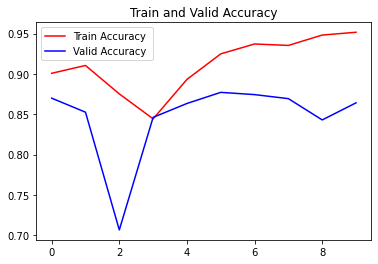

<Figure size 432x288 with 0 Axes>

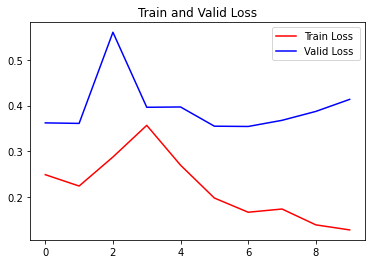

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train Accuracy ')                
plt.plot(epochs, val_acc, 'b', label='Valid Accuracy')
plt.title('Train and Valid Accuracy')
plt.legend(loc=0)
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Train Loss ')                
plt.plot(epochs, val_loss, 'b', label='Valid Loss')
plt.title('Train and Valid Loss')
plt.legend(loc=0)
plt.figure()                                                                      
plt.show()